# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

masks = np.stack(list(map(lambda index: np.load(f'../data/masks_train/mask_{index:03d}.npy'), range(40))))
indices_train = np.load('../data/indices_train.npy')

# Plot Masks

In [4]:
def plot_masks(array: np.ndarray, num_rows: int, num_cols: int, fig_size_factor=20, out_file = None):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_size_factor, fig_size_factor*(num_rows/num_cols)))

    for i in range(num_rows):
        for j in range(num_cols):
            axes[i,j].scatter(
                    indices_train[indices_train[:, 0] == i*num_cols+j, 3], 
                    indices_train[indices_train[:, 0] == i*num_cols+j, 2], 
                    c='#942738', s=2)
    for ax in axes.reshape(-1):
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlim([0, 1024])
        ax.set_ylim([0, 1024])
        ax.invert_yaxis()
    fig.tight_layout()
    if out_file is not None:
        plt.savefig(out_file, bbox_inches='tight')
    plt.show()

Plot *all* masks.

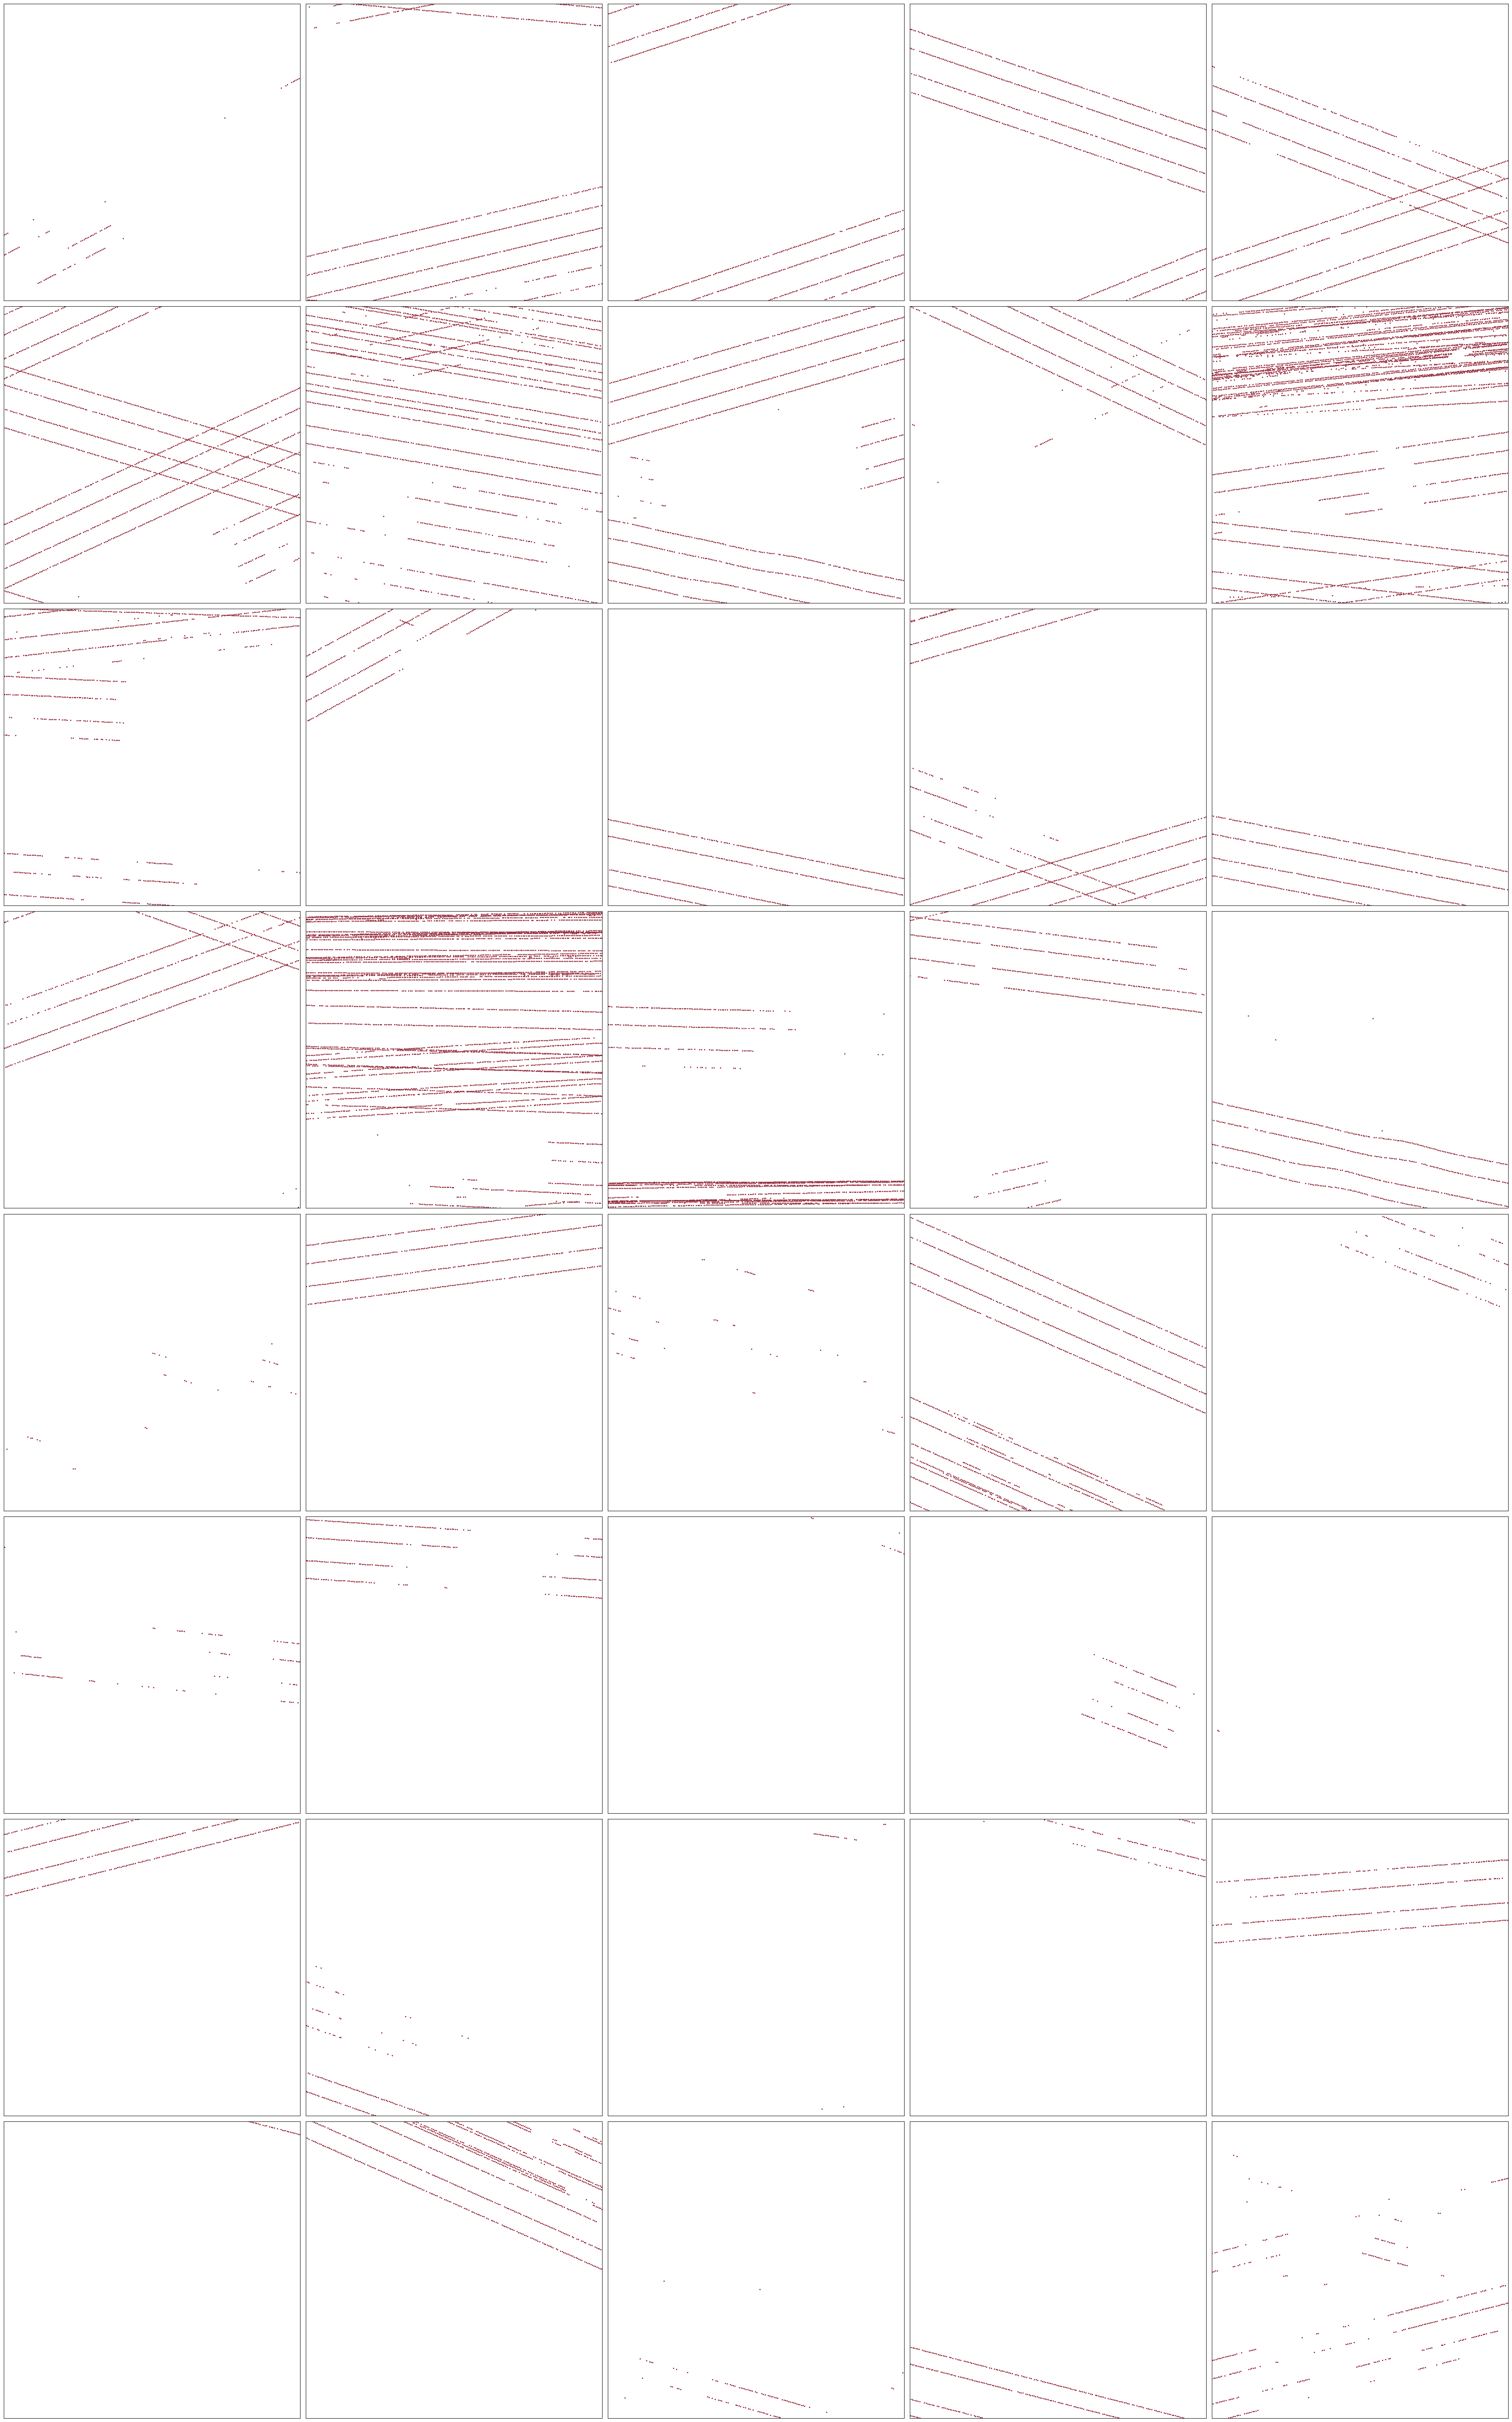

In [5]:
plot_masks(masks, 8, 5, 40, out_file='Masks.png')

Plot mask with index `13`.

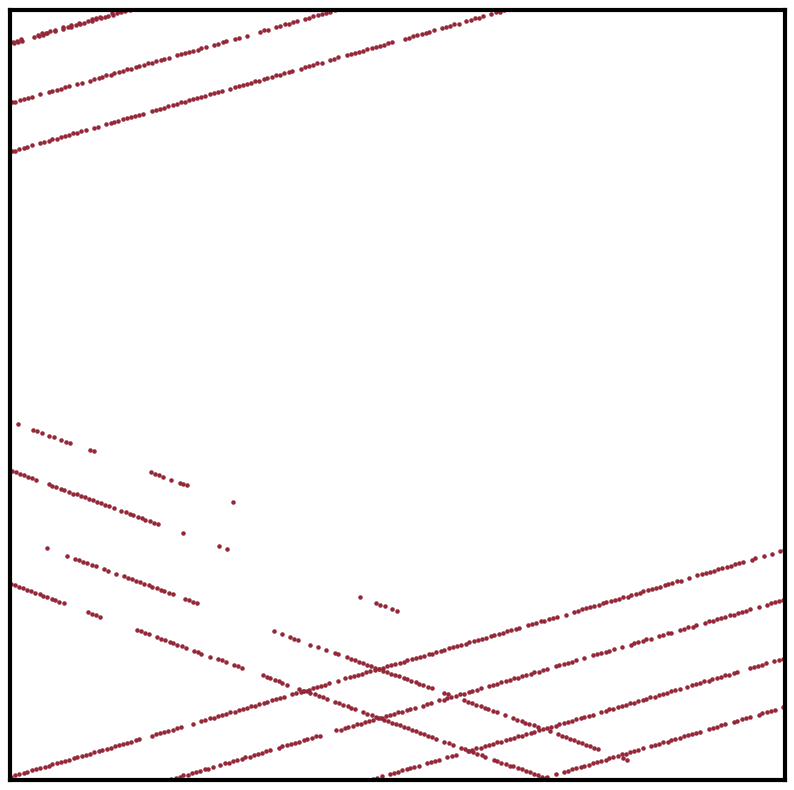

In [6]:
i = 13

plt.rcParams["axes.linewidth"] = 3
fig, ax = plt.subplots(figsize=(10, 10))
scatter_plot = ax.scatter(indices_train[indices_train[:, 0] == i, 3], 
                          indices_train[indices_train[:, 0] == i, 2], 
                          c='#942738', s=5)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim([0, 1024])
ax.set_ylim([0, 1024])
ax.invert_yaxis()
plt.savefig('Example_Mask.png', bbox_inches='tight', pad_inches = 0)
plt.show()